<a href="https://colab.research.google.com/github/gregmaya/J-Graph/blob/main/Creating_J_graph_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install networkx[default]
#!pip install numpy
#!pip uninstall matplotlib
#!pip install matplotlib==3.1.3

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from itertools import count
import pandas as pd

# Functions

In [10]:
def jgraph_from_node(G, origin):
  """
  Draws the Justified graph (J-graph) from the selected origin.
  Internally it calculates the shortest topological distance from every node \
  to the defined origin

  RETURNS
  ---
  A visual representation of the JGraph
  """
  nodes = G.nodes()
  topo_steps = [nx.shortest_path_length(G, source=origin, target= n) for n in nodes]
  d = [(n,{'steps':s}) for n,s in zip(nodes,topo_steps)]
  
  topo_steps = [nx.shortest_path_length(G, source=origin, target= n) for n in nodes]

  d = [(n,{'steps':s}) for n,s in zip(nodes,topo_steps)]

  G = nx.Graph()
  G.add_edges_from(edges)
  G.add_nodes_from(d)

  pos = nx.multipartite_layout(G,subset_key='steps', align='horizontal',scale=1.75)
  plt.figure(figsize=(10,10))
  nx.draw(G ,pos=pos, 
          with_labels=True, 
          node_color='orange', node_size=800)

  print('Mean depth = '+ str(round(sum(topo_steps)/len(topo_steps),2)))
  print('Maximum topological steps = '+ str(max(topo_steps)))

In [22]:
def mean_depth_calcs(G,graph_output = False):
  """
  needs description! 
  """
  #for loop to calculate all mean depths from all points
  mean_depths = []
  for n in nodes:
    topo_steps = [nx.shortest_path_length(G, source=n, target= no) for no in nodes]
    md = sum(topo_steps)/len(topo_steps)
    mean_depths.append(md)
  mean_depth = {n: md for n,md in zip(nodes,mean_depths)}

  if graph_output == True :
    nx.set_node_attributes(G,mean_depth,name='mean_depth')
    output = G
  else :
    output = pd.DataFrame.from_dict(mean_depth,orient='index', columns=['mean_depth'])

  return output

# Examples

In [23]:
#Casa Rio Frio Salmona
edges = [('M','L'),('L','K'),('K','Q'),('O','Q'),('Q','P'),('N','Q'),
         ('Q','C'),('C','E'),('T','R'),('S','R'),('J','B'),('J','F'),
         ('B','R'),('B','C'),('B','A'),('R','D'),('C','D'),('C','D'),
         ('C','F'),('G','H'),('G','F'),('F','I'),('A','X'),('D','H'),
         ('D','X'),('H','X'),('I','X')]

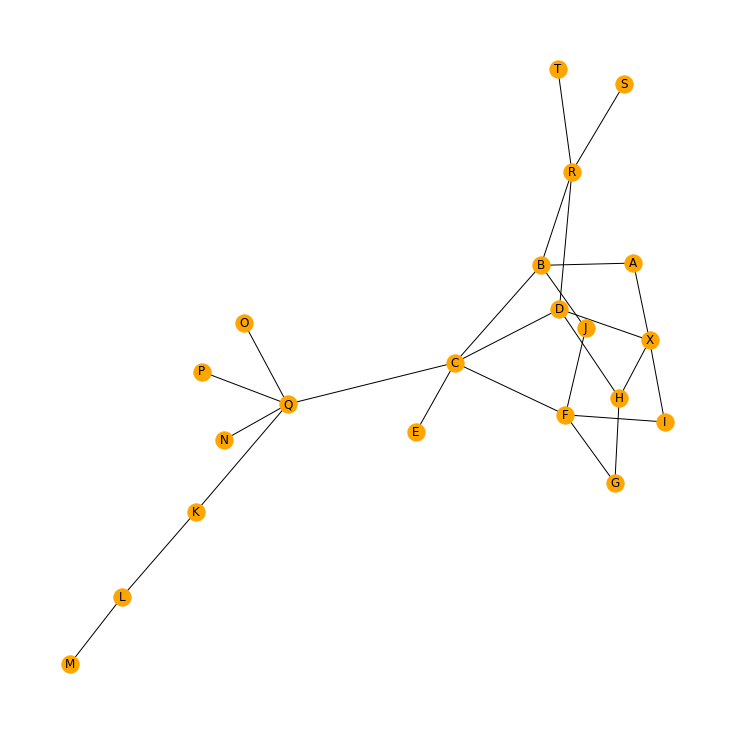

In [24]:
G = nx.Graph()
G.add_edges_from(edges)
#nodes = G.nodes()

plt.figure(figsize=(10,10))
nx.draw(G, with_labels = True, node_color ='orange')

Mean depth = 1.9
Maximum topological steps = 4


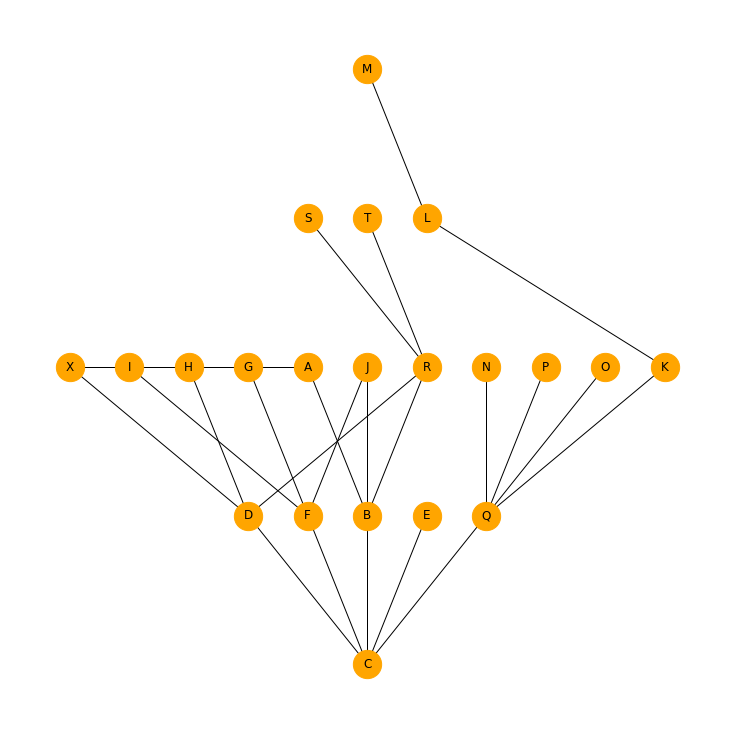

In [25]:
jgraph_from_node(G,'C')

In [26]:
df = mean_depth_calcs(G)
df

,mean_depth
M,4.666667
L,3.761905
K,2.952381
Q,2.238095
O,3.142857
P,3.142857
N,3.142857
C,1.904762
E,2.809524
T,3.571429


# needs updating

In [12]:
clm_name = 'stps_'+ origin
depth_df[clm_name] = topo_steps

#depth_df.to_csv(path_or_buf='/content/sample_data/network_depth.csv')
depth_df.head()

,mean_depth,stps_A
M,4.666667,6
L,3.761905,5
K,2.952381,4
Q,2.238095,3
O,3.142857,4


# New section

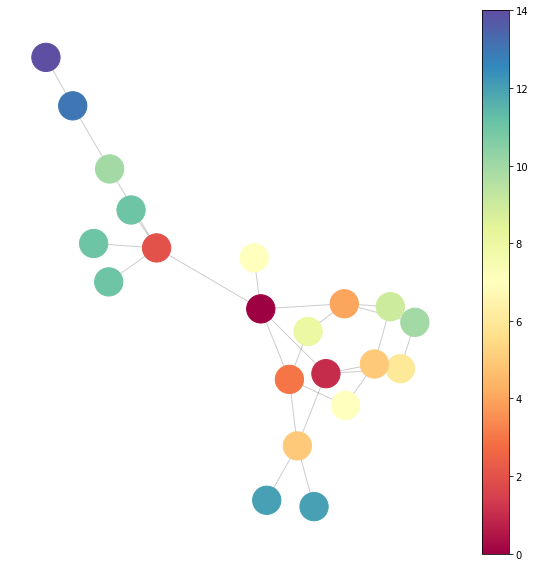

In [ ]:
# create number for each group to allow use of colormap
groups = set(nx.get_node_attributes(G,'mean_depth').values())
mapping = dict(zip(sorted(groups),count()))
nodes = G.nodes()
# get unique groups
groups = set(nx.get_node_attributes(G,'mean_depth').values())
mapping = dict(zip(sorted(groups),count()))
nodes = G.nodes()
colors = [mapping[G.nodes[n]['mean_depth']] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colorbar
pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors,
                            node_size=800, cmap=plt.cm.Spectral) #YlGnBu

# NEEEDS TO LOOP OVER EACH VERTEX
#plt.annotate(label, # this is the text
#                 (x,y), # these are the coordinates to position the label
#                 textcoords="offset points", # how to position the text
#                 xytext=(0,-10), # distance from text to points (x,y)
#                 ha='center')


plt.colorbar(nc)
plt.axis('off')
plt.show()